In [1]:
from typing import Any
import torch
from torchvision import datasets, transforms

In diesem Beispiel sehen wir uns MNIST an.
Hierbei handelt es sich um eine Datenbank aus
70000 handgeschriebenen Ziffern, davon 60000 im Trainings-
und 10000 im Testdatensatz.

In [2]:
train_set = datasets.MNIST("data", train=True, download=True,
                       transform=transforms.Compose([transforms.ToTensor()]))
test_set = datasets.MNIST("data", train=False, download=True,
                       transform=transforms.Compose([transforms.ToTensor()]))

Diesen Datensatz packen wir nun in einen passenden `DataLoader`.
Mit diesem können wir gut über Datensätze iterieren.

In [3]:
batch_size = 100

train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size, shuffle=False)

Das erste Element des DataLoaders sieht wie folgt aus:

In [4]:
fst_data = next(iter(train_loader))
print(fst_data)

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

Betrachten beispielhaft wir die erste Ziffer.

Text(0.5, 1.0, 'Value: 1')

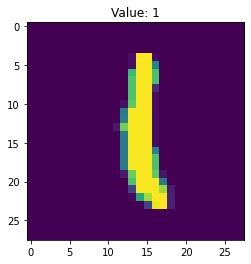

In [5]:
fst_image = fst_data[0][0]
fst_digit = fst_data[1][0].item()

import matplotlib.pyplot as plt
plt.imshow(fst_image.view(fst_image.shape[1], fst_image.shape[2]))
plt.title("Value: " + str(fst_digit))

### Logistische Regression
Nun erstellen wir die Architektur der logistischen Regression.

In [6]:
class LogisticRegression(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegression, self).__init__()
        self.linear = torch.nn.Linear(input_dim, output_dim)

    def forward(self, x):
        outputs = self.linear(x)
        return outputs

In [7]:
n_iters = 3000
epochs = int(n_iters / (len(train_set) / batch_size))
input_dim = 28*28
output_dim = 10
lr_rate = 0.001

In [8]:
model = LogisticRegression(input_dim, output_dim)

Jetzt initialisieren wir die Loss class und den Optimizer (Stochastic Gradient Descent).

In [9]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr_rate)

In [10]:
from torch.autograd import Variable

for epoch in range(epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = Variable(images.view(batch_size, 28 * 28))
        labels = Variable(labels)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        iteration = epoch * len(train_loader) + i
        if iteration % 500 == 0:
            # calculate Accuracy
            correct = 0
            total = 0
            for images, labels in test_loader:
                images = Variable(images.view(batch_size, 28*28))
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum()
            accuracy = 100 * correct.item() / total
            print(f"Iteration: {iteration}. Loss: {loss.item()}. Accuracy: {accuracy}.")


Iteration: 0. Loss: 2.3342204093933105. Accuracy: 6.76.
Iteration: 500. Loss: 1.879074215888977. Accuracy: 67.72.
Iteration: 1000. Loss: 1.528935432434082. Accuracy: 76.71.
Iteration: 1500. Loss: 1.314855933189392. Accuracy: 79.44.
Iteration: 2000. Loss: 1.099409818649292. Accuracy: 80.97.
Iteration: 2500. Loss: 1.0250781774520874. Accuracy: 82.07.
